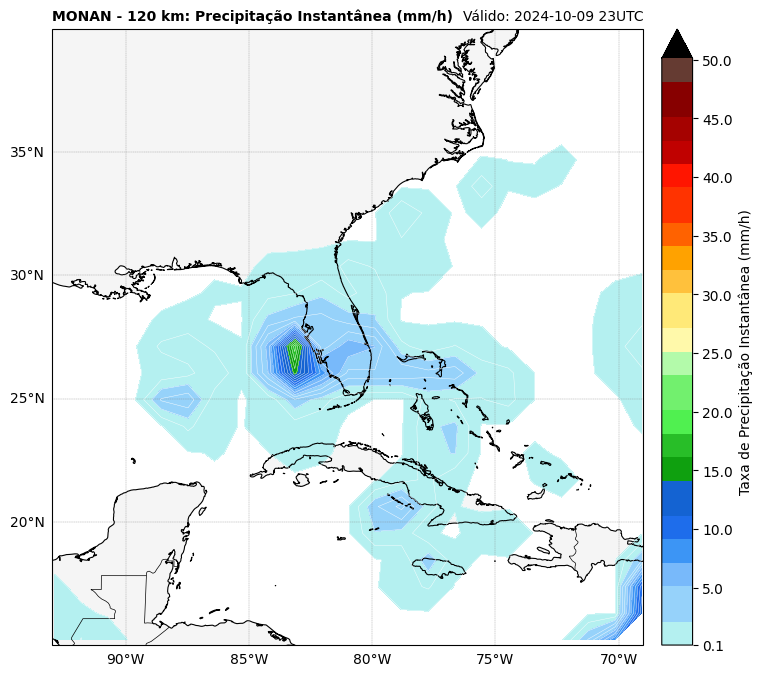

In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
# Abrir o arquivo NetCDF usando xarray
arquivo = '/home/arthursilva/projetos/Scripts/python/apnt/Samples/postprd/MONAN_DIAG_R_POS_GFS_2024100900_2024100923.mm.x1.40962L55.nc'
ds = xr.open_dataset(arquivo)
ds = ds.sel(longitude=slice(-93, -69), latitude=slice(15, 40))

# Escolher a variável que deseja plotar (exemplo: 'prec' para precipitação instantânea)
variable_name = 'prec'
data = ds[variable_name]

# Selecionar o primeiro tempo ou outro ponto no tempo conforme necessário
data_at_time = data.isel(Time=0)  # Exemplo: seleciona o primeiro instante de tempo

# Obter a data (ajustar conforme a estrutura temporal do novo arquivo)
time_var = data.Time.values
if np.isscalar(time_var):
    valid = str(time_var)
else:
    valid = str(time_var[0])

valid = valid.replace('-', '').replace('T', '').replace(':', '')[:10]
formatted_date = f"{valid[:4]}-{valid[4:6]}-{valid[6:8]}"
hora = f"{valid[8:10]}UTC"


# Extrair as coordenadas de latitude e longitude
lats = ds['latitude'].values
lons = ds['longitude'].values

# Ajustar as longitudes para o intervalo [-180, 180] se necessário
lons = (lons + 180) % 360 - 180  # Corrige as longitudes para a projeção correta

# Criar uma paleta de cores personalizada
colors = ["#b4f0f0", "#96d2fa", "#78b9fa", "#3c95f5", "#1e6deb", "#1463d2", 
          "#0fa00f", "#28be28", "#50f050", "#72f06e", "#b3faaa", "#fff9aa", 
          "#ffe978", "#ffc13c", "#ffa200", "#ff6200", "#ff3300", "#ff1500", 
          "#c00100", "#a50200", "#870000", "#653b32"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#000000')
cmap.set_under('#ffffff')

# Escolher o tamanho do gráfico (largura x altura, em polegadas)
fig, axs = plt.subplots(1, 1, figsize=(12, 8), subplot_kw=dict(projection=ccrs.PlateCarree()))

# Definir os limites da região de interesse com Santarém no centro
#axs.set_extent([-60, -50, -6, 3], ccrs.PlateCarree())  # Santarém fica aproximadamente no centro
axs.set_extent([-93, -69, 15, 40], ccrs.PlateCarree())


# Adicionar um fundo
axs.add_feature(cfeature.LAND, facecolor='whitesmoke')
axs.add_feature(cfeature.OCEAN, facecolor='white')

# Adicionar um shapefile (se necessário)
shapefile = list(shpreader.Reader('/home/arthursilva/projetos/Scripts/python/apnt/BR_UF_2019.shp').geometries())
axs.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

# Adicionar linhas de costa e bordas
axs.coastlines(resolution='10m', color='black', linewidth=0.8)
axs.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.5)

# Definir a grade
gl = axs.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, 
                   xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Definir o intervalo do contorno
data_min = 0.1
data_max = 50
interval = 1
levels = np.arange(data_min, data_max + interval, interval)

# Plotar os contornos
img1 = axs.contourf(lons, lats, data_at_time, cmap=cmap, levels=levels, extend='max')
img2 = axs.contour(lons, lats, data_at_time, colors='white', linewidths=0.3, levels=levels)

# Definir os ticks a serem mostrados
ticks = [0.1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

# Adicionar uma barra de cores
plt.colorbar(img1, label='Taxa de Precipitação Instantânea (mm/h)', orientation='vertical', 
             pad=0.02, fraction=0.05, ticks=ticks, ax=axs)

# Adicionar um título
axs.set_title('MONAN - 120 km: Precipitação Instantânea (mm/h)', fontweight='bold', fontsize=10, loc='left')
#axs.set_title('Válido: ' + str(ds['Time'].isel(Time=0).values), fontsize=10, loc='right')
axs.set_title('Válido: ' + formatted_date + ' ' + hora, fontsize=10, loc='right')

# Mostrar o gráfico
plt.show()


TypeError: Length of x (24) must match number of columns in z (23)

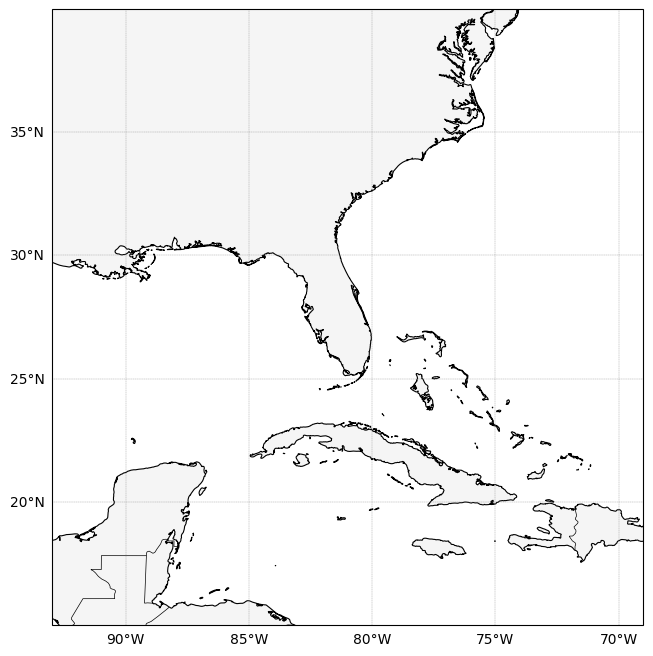

In [11]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

# Abrir o arquivo NetCDF usando xarray
arquivo = '/home/arthursilva/projetos/Scripts/python/apnt/Samples/postprd/MONAN_DIAG_R_POS_GFS_2024100900_2024100923.mm.x1.40962L55.nc'
data = xr.open_dataset(arquivo)
data = data.sel(longitude=slice(-93, -69), latitude=slice(15, 40))

# Verificar a variável level e converter para hPa, se estiver em Pa
if 'level' in data.coords:
    data.coords['level'] = data.coords['level'] / 100
    data.coords['level'].attrs['units'] = 'hPa'

# selecionar o vento e o nibel de pressão
# Selecionar componentes do vento
ucomp = data['uvmt_isobaric'].sel(level=950).squeeze()  # Squeeze para remover dimensões extras
vcomp = data['vvmt_isobaric'].sel(level=950).squeeze()  # Squeeze para remover dimensões extras

# Escolher a variável que deseja plotar (exemplo: 'prec' para precipitação instantânea)
variable_name = 'prec'
data_at_time = data[variable_name].isel(Time=0)

# Obter a data (ajustar conforme a estrutura temporal do novo arquivo)
time_var = ds.Time.values
if np.isscalar(time_var):
    valid = str(time_var)
else:
    valid = str(time_var[0])

valid = valid.replace('-', '').replace('T', '').replace(':', '')[:10]
formatted_date = f"{valid[:4]}-{valid[4:6]}-{valid[6:8]}"
hora = f"{valid[8:10]}UTC"

# Extrair as coordenadas de latitude e longitude
lats = ds['latitude'].values
lons = ds['longitude'].values
lons = (lons + 180) % 360 - 180  # Corrige as longitudes para a projeção correta

# Criar uma paleta de cores personalizada
colors = ["#b4f0f0", "#96d2fa", "#78b9fa", "#3c95f5", "#1e6deb", "#1463d2", 
          "#0fa00f", "#28be28", "#50f050", "#72f06e", "#b3faaa", "#fff9aa", 
          "#ffe978", "#ffc13c", "#ffa200", "#ff6200", "#ff3300", "#ff1500", 
          "#c00100", "#a50200", "#870000", "#653b32"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#000000')
cmap.set_under('#ffffff')

# Escolher o tamanho do gráfico
fig, axs = plt.subplots(1, 1, figsize=(12, 8), subplot_kw=dict(projection=ccrs.PlateCarree()))
axs.set_extent([-93, -69, 15, 40], ccrs.PlateCarree())

# Adicionar um fundo
axs.add_feature(cfeature.LAND, facecolor='whitesmoke')
axs.add_feature(cfeature.OCEAN, facecolor='white')

# Adicionar um shapefile (se necessário)
shapefile = list(shpreader.Reader('/home/arthursilva/projetos/Scripts/python/apnt/BR_UF_2019.shp').geometries())
axs.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

# Adicionar linhas de costa e bordas
axs.coastlines(resolution='10m', color='black', linewidth=0.8)
axs.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.5)

# Definir a grade
gl = axs.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, 
                   xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Definir o intervalo do contorno
data_min = 0.1
data_max = 50
interval = 1
levels = np.arange(data_min, data_max + interval, interval)

# Plotar os contornos de precipitação
img1 = axs.contourf(lons, lats, data_at_time, cmap=cmap, levels=levels, extend='max')

# Ajustar a escala do quiver para os vetores de vento
scale = 500

# Plotar os vetores de vento (usando quiver)
q = axs.quiver(lons[::2], lats[::2], ucomp.values[::2, ::2], vcomp.values[::2, ::2], 
               scale=scale, color='black', pivot='middle')

# Adicionar a barra de cores para a precipitação
cbar = plt.colorbar(img1, ax=axs, orientation='vertical', pad=0.02, fraction=0.05)
cbar.set_label('Taxa de Precipitação Instantânea (mm/h)', fontweight='bold', fontsize=10)

# Adicionar um título
axs.set_title('MONAN - 120 km: Precipitação Instantânea (mm/h)', fontweight='bold', fontsize=10, loc='left')
axs.set_title('Válido: ' + formatted_date + ' ' + hora, fontsize=10, loc='right')

# Mostrar o gráfico
plt.show()


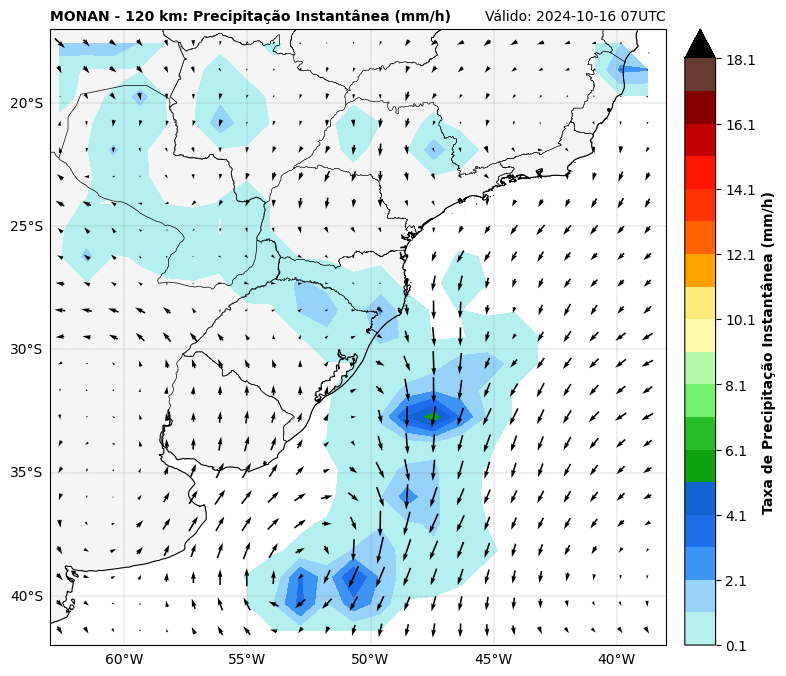

In [6]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

# Abrir o arquivo NetCDF usando xarray
arquivo = '/home/arthursilva/saidas-mpas/2024101500/MONAN_DIAG_R_POS_GFS_2024101500_2024101607.mm.x1.40962L55.nc'
ds = xr.open_dataset(arquivo)
ds = ds.sel(longitude=slice(-63, -38), latitude=slice(-42, -17))

# Verificar a variável level e converter para hPa, se estiver em Pa
if 'level' in ds.coords:
    ds.coords['level'] = ds.coords['level'] / 100
    ds.coords['level'].attrs['units'] = 'hPa'

# Escolher a variável que deseja plotar (exemplo: 'prec' para precipitação instantânea)
variable_name = 'prec'
data_at_time = ds[variable_name].isel(Time=0)

# Selecionar componentes do vento
ucomp = ds['uvmt_isobaric'].sel(level=850).squeeze()
vcomp = ds['vvmt_isobaric'].sel(level=850).squeeze()

# Obter a data (ajustar conforme a estrutura temporal do novo arquivo)
time_var = ds.Time.values
if np.isscalar(time_var):
    valid = str(time_var)
else:
    valid = str(time_var[0])

valid = valid.replace('-', '').replace('T', '').replace(':', '')[:10]
formatted_date = f"{valid[:4]}-{valid[4:6]}-{valid[6:8]}"
hora = f"{valid[8:10]}UTC"

# Extrair as coordenadas de latitude e longitude
lats = ds['latitude'].values
lons = ds['longitude'].values
lons = (lons + 180) % 360 - 180  # Corrige as longitudes para a projeção correta

# Verificar e ajustar as dimensões (transpor os dados se necessário)
if data_at_time.shape != (len(lats), len(lons)):
    data_at_time = data_at_time.transpose('latitude', 'longitude')

# Criar uma paleta de cores personalizada
colors = ["#b4f0f0", "#96d2fa", "#78b9fa", "#3c95f5", "#1e6deb", "#1463d2", 
          "#0fa00f", "#28be28", "#50f050", "#72f06e", "#b3faaa", "#fff9aa", 
          "#ffe978", "#ffc13c", "#ffa200", "#ff6200", "#ff3300", "#ff1500", 
          "#c00100", "#a50200", "#870000", "#653b32"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#000000')
cmap.set_under('#ffffff')

# Escolher o tamanho do gráfico
fig, axs = plt.subplots(1, 1, figsize=(12, 8), subplot_kw=dict(projection=ccrs.PlateCarree()))
axs.set_extent([-63, -38, -42, -17], ccrs.PlateCarree()) # altere aqui a região de interesse

# Adicionar um fundo
axs.add_feature(cfeature.LAND, facecolor='whitesmoke')
axs.add_feature(cfeature.OCEAN, facecolor='white')

# Adicionar um shapefile (se necessário)
shapefile = list(shpreader.Reader('/home/arthursilva/projetos/Scripts/python/apnt/BR_UF_2019.shp').geometries())
axs.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

# Adicionar linhas de costa e bordas
axs.coastlines(resolution='10m', color='black', linewidth=0.8)
axs.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.5)

# Definir a grade
gl = axs.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, 
                   xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Definir o intervalo do contorno
data_min = 0.1
data_max = 18
interval = 1
levels = np.arange(data_min, data_max + interval, interval)

# Plotar os contornos de precipitação
img1 = axs.contourf(lons, lats, data_at_time, cmap=cmap, levels=levels, extend='max')

# Ajustar a escala do quiver para os vetores de vento
scale = 500

# Plotar os vetores de vento (usando quiver)
q = axs.quiver(lons[::1], lats[::1], ucomp.values[::1, ::1], vcomp.values[::1, ::1], 
               scale=scale, color='black', pivot='middle')



# Adicionar a barra de cores para a precipitação
cbar = plt.colorbar(img1, ax=axs, orientation='vertical', pad=0.02, fraction=0.05)
cbar.set_label('Taxa de Precipitação Instantânea (mm/h)', fontweight='bold', fontsize=10)

# Adicionar um título
axs.set_title('MONAN - 120 km: Precipitação Instantânea (mm/h)', fontweight='bold', fontsize=10, loc='left')
axs.set_title('Válido: ' + formatted_date + ' ' + hora, fontsize=10, loc='right')

# Mostrar o gráfico
plt.show()


In [7]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

# Função para gerar o gráfico
def gerar_grafico(ds, variable_name, time_idx, output_dir):
    # Selecionar o tempo e variável
    data_at_time = ds[variable_name].isel(Time=time_idx)

    # Selecionar componentes do vento
    ucomp = ds['uvmt_isobaric'].sel(level=850).isel(Time=time_idx).squeeze()
    vcomp = ds['vvmt_isobaric'].sel(level=850).isel(Time=time_idx).squeeze()

    # Extrair as coordenadas de latitude e longitude
    lats = ds['latitude'].values
    lons = ds['longitude'].values
    lons = (lons + 180) % 360 - 180  # Corrige as longitudes para a projeção correta

    # Verificar e ajustar as dimensões
    if data_at_time.shape != (len(lats), len(lons)):
        data_at_time = data_at_time.transpose('latitude', 'longitude')

    # Criar uma paleta de cores personalizada
    colors = ["#b4f0f0", "#96d2fa", "#78b9fa", "#3c95f5", "#1e6deb", "#1463d2", 
              "#0fa00f", "#28be28", "#50f050", "#72f06e", "#b3faaa", "#fff9aa", 
              "#ffe978", "#ffc13c", "#ffa200", "#ff6200", "#ff3300", "#ff1500", 
              "#c00100", "#a50200", "#870000", "#653b32"]
    cmap = matplotlib.colors.ListedColormap(colors)
    cmap.set_over('#000000')
    cmap.set_under('#ffffff')

    # Escolher o tamanho do gráfico
    fig, axs = plt.subplots(1, 1, figsize=(12, 8), subplot_kw=dict(projection=ccrs.PlateCarree()))
    axs.set_extent([-63, -38, -42, -17], ccrs.PlateCarree())

    # Adicionar um fundo
    axs.add_feature(cfeature.LAND, facecolor='whitesmoke')
    axs.add_feature(cfeature.OCEAN, facecolor='white')

    # Adicionar um shapefile
    shapefile = list(shpreader.Reader('/home/arthursilva/projetos/Scripts/python/apnt/BR_UF_2019.shp').geometries())
    axs.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

    # Adicionar linhas de costa e bordas
    axs.coastlines(resolution='10m', color='black', linewidth=0.8)
    axs.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.5)

    # Definir a grade
    gl = axs.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, 
                       xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False

    # Definir o intervalo do contorno
    data_min = 0.1
    data_max = 15
    interval = 1
    levels = np.arange(data_min, data_max + interval, interval)

    # Plotar os contornos de precipitação
    img1 = axs.contourf(lons, lats, data_at_time, cmap=cmap, levels=levels, extend='max')

    # Ajustar a escala do quiver para os vetores de vento
    scale = 500

    # Plotar os vetores de vento (usando quiver)
    q = axs.quiver(lons[::1], lats[::1], ucomp.values[::1, ::1], vcomp.values[::1, ::1], 
                   scale=scale, color='black', pivot='middle')

    # Adicionar a barra de cores para a precipitação
    cbar = plt.colorbar(img1, ax=axs, orientation='vertical', pad=0.02, fraction=0.05)
    cbar.set_label('Taxa de Precipitação Instantânea (mm/h)', fontweight='bold', fontsize=10)

    # Obter a data e hora
    time_var = ds.Time.values
    valid = str(time_var[time_idx]) if not np.isscalar(time_var) else str(time_var)
    valid = valid.replace('-', '').replace('T', '').replace(':', '')[:10]
    formatted_date = f"{valid[:4]}-{valid[4:6]}-{valid[6:8]}"
    hora = f"{valid[8:10]}UTC"

    # Adicionar um título
    axs.set_title('MONAN - 120 km: Precipitação Instantânea (mm/h)', fontweight='bold', fontsize=10, loc='left')
    axs.set_title('Válido: ' + formatted_date + ' ' + hora, fontsize=10, loc='right')

    # Salvar o gráfico em um arquivo
    output_filename = f"{formatted_date}_{hora}_{variable_name}.png"
    output_path = os.path.join(output_dir, output_filename)
    plt.savefig(output_path, bbox_inches='tight')
    plt.close()

# Diretório onde os arquivos NetCDF estão localizados
input_dir = '/home/arthursilva/saidas-mpas/2024101500'
output_dir = '/home/arthursilva/saidas-mpas/2024101500/figures'

# Criar o diretório de saída se não existir
os.makedirs(output_dir, exist_ok=True)

# Listar todos os arquivos .nc no diretório
arquivos_nc = sorted([f for f in os.listdir(input_dir) if f.endswith('.nc')])

# Loop sobre os arquivos .nc
for arquivo in arquivos_nc:
    caminho_arquivo = os.path.join(input_dir, arquivo)
    
    # Abrir o arquivo NetCDF usando xarray
    ds = xr.open_dataset(caminho_arquivo)
    ds = ds.sel(longitude=slice(-63, -38), latitude=slice(-42, -17))

    # Verificar a variável level e converter para hPa, se necessário
    if 'level' in ds.coords:
        ds.coords['level'] = ds.coords['level'] / 100
        ds.coords['level'].attrs['units'] = 'hPa'

    # Escolher a variável que deseja plotar (exemplo: 'prec' para precipitação instantânea)
    variable_name = 'prec'

    # Iterar sobre o tempo no arquivo
    for time_idx in range(len(ds.Time)):
        gerar_grafico(ds, variable_name, time_idx, output_dir)


In [9]:
import os
import imageio
import matplotlib.pyplot as plt

# Defina o diretório onde estão as figuras salvas
diretorio_figuras = '/home/arthursilva/saidas-mpas/2024101500/figures/'  # Substitua pelo caminho real

# Obtenha a lista de todos os arquivos .png no diretório e ordene
arquivos_figuras = sorted([f for f in os.listdir(diretorio_figuras) if f.endswith('.png')])

# Defina o caminho para salvar a animação
caminho_animacao = '/home/arthursilva/saidas-mpas/2024101500/figures/animacao-prec0.gif'  # Substitua pelo caminho desejado

# Criar uma lista para armazenar as imagens
imagens = []

# Ler cada imagem e adicionar à lista
for arquivo in arquivos_figuras:
    caminho_arquivo = os.path.join(diretorio_figuras, arquivo)
    imagem = imageio.imread(caminho_arquivo)
    imagens.append(imagem)

# Criar a animação
imageio.mimsave(caminho_animacao, imagens, duration=400)  # A duração pode ser ajustada

print("Animação gerada com sucesso.")


/tmp/ipykernel_10100/2153056364.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagem = imageio.imread(caminho_arquivo)


Animação gerada com sucesso.
